# Comparison of three distributions


**Code:** #131-000

**File:** `apps/fermi_gas/distribution_comparison.ipynb`

**Run it online:** [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Ikergym/MinervaLab/master?filepath=apps%2Ffermi_gas%2Fdistribution_comparison.ipynb)

-----------

The aim of this notebook is to compare the distribution funciton for the Fermi-Dirac, Bose-Einstein and Maxwell-Boltzmann statistics.

## Interface

The main interface (``main_block_131_000``) is divided in two VBox: ``left_block_131_000`` and ``center_block_124_000``.

``left_block_124_000`` contains three widgets to control scale and center of the figure: ``x_center_slider``, ``x_width_slider`` and ``y_width_slider``.

``center_block_124_000`` contains only the bqplot figure ``fig_131_001``.

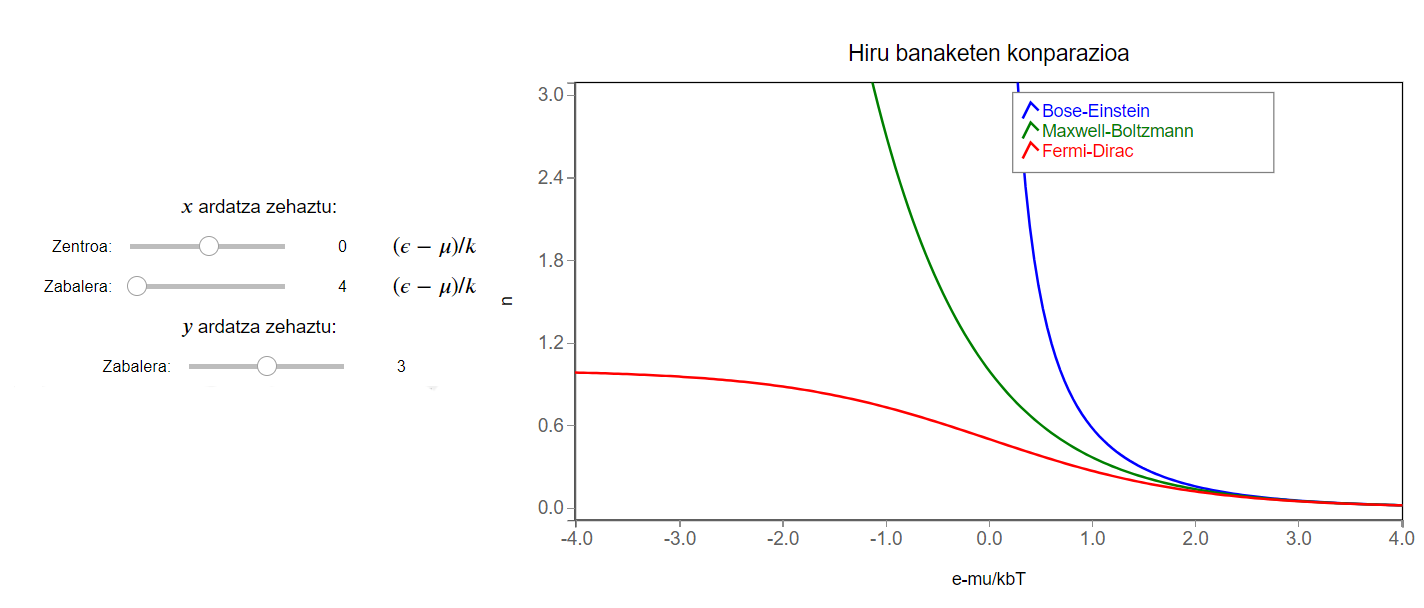

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [1]:
from IPython.display import Image
Image(filename='../../static/images/apps/fermi_gas/131-000.png')

## CSS

A custom `css` file is used to improve the interface of this application. It can be found [here](https://github.com/jongablop/MinervaLab/blob/master/static/custom.css).

## Packages

In [ ]:
import numpy as np

from bqplot import *
import bqplot as bq
import bqplot.marks as bqm
import bqplot.scales as bqs
import bqplot.axes as bqa

import ipywidgets as widgets

## Functions related to the interaction

In [ ]:
def update_scales(change):
    '''
    This function updates the x and y scales of the plot and it's center
    whenever a widget's value is changed.
    '''
    
    # Read the widgets
    x_center = x_center_slider.value
    x_width = x_width_slider.value
    y_width = y_width_slider.value
    
    # Define scales
    scale_x_131_001 = bqs.LinearScale(min = x_center - x_width, max = x_center + x_width)
    scale_y_131_001 = bqs.LinearScale(min = 0.0, max = y_width)
    
    # Update scales
    axis_x_131_001.scale = scale_x_131_001
    axis_x_131_001.tick_values = np.linspace(x_center - x_width, x_center + x_width, 9)
    axis_y_131_001.scale = scale_y_131_001
    axis_y_131_001.tick_values = np.linspace(0.0, y_width, 6)
    
    # Update scales on marks
    lines_BoseEinstein_131_001.scales = {'x': scale_x_131_001, 'y': scale_y_131_001}
    lines_MaxwellBoltzmann_131_001.scales = {'x': scale_x_131_001, 'y': scale_y_131_001}
    lines_FermiDirac_131_001.scales = {'x': scale_x_131_001, 'y': scale_y_131_001}    

## Main interface

In [ ]:
#######################
###   PARAMETERS    ###
#######################

# Plot parameters
pts = 5000  # Number of points to calculate

# Initial values
x_center = 0.0  # Center of x-axis  
x_width = 4.0  # Max. displacement from the center to either side

# Define x-axis values
x_values = np.linspace(-105.0,105.0,pts)

# Calculate distributions
BoseEinstein_values = np.empty(pts)
MaxwellBoltzmann_values = np.empty(pts)
FermiDirac_values = np.empty(pts)

for i in range(pts):
    x = x_values[i]
    
    if x > 0.01:
        BoseEinstein_values[i] = 1.0/(np.exp(x)-1.0)
    else:
        BoseEinstein_values[i] = None  #Cut off negative values and infinite at x=0.
        
    if x > -5.0:
        MaxwellBoltzmann_values[i] = 1.0/np.exp(x)
    else:
        MaxwellBoltzmann_values[i] = None  #Cut off too high values
        
    #MaxwellBoltzmann_values[i] = 1.0/np.exp(x)
    FermiDirac_values[i] = 1.0/(np.exp(x)+1.0)


########################
###CREATE THE FIGURES###
########################

fig_131_001 = bq.Figure(title='Hiru banaketen konparazioa',
                marks=[],
                axes=[],
                padding_x=0.0,
                animation_duration=0,
                legend_location='top-right',
                legend_style= {'fill': 'white', 'stroke': 'grey'},
                background_style= {'fill': 'white',  'stroke': 'black'},
                fig_margin=dict(top=70, bottom=60, left=80, right=30),
                layout = widgets.Layout(width='95%'),
                toolbar = True,
)

scale_x_131_001 = bqs.LinearScale(min = x_center - x_width, max = x_center + x_width, allow_padding = False)
scale_y_131_001 = bqs.LinearScale(min = 0.0, max = 3.0)

axis_x_131_001 = bqa.Axis(
                scale=scale_x_131_001,
                tick_format='.1f',#'0.2f',
                tick_style={'font-size': '15px'},
                #tick_values = np.linspace(p_min, p_max, 7),
                num_ticks=9,
                grid_lines = 'none',
                grid_color = '#8e8e8e', 
                label='e-mu/kbT',
                label_location='middle',
                label_style={'stroke': 'black', 'default-size': 35},
                label_offset='50px')

axis_y_131_001 = bqa.Axis(
                scale=scale_y_131_001,
                tick_format='.1f',#'0.2f',
                tick_style={'font-size': '15px'},
                tick_values = np.linspace(0.0,5.0,6),
                grid_lines = 'none',
                grid_color = '#8e8e8e', 
                orientation='vertical',
                label='n',
                label_location='middle',
                label_style={'stroke': 'red', 'default_size': 35},
                label_offset='50px')

fig_131_001.axes = [axis_x_131_001, axis_y_131_001]


########################
####CREATE THE MARKS####
########################

lines_BoseEinstein_131_001 = bqm.Lines(
                x = x_values, 
                y = BoseEinstein_values, 
                scales = {'x': scale_x_131_001, 'y': scale_y_131_001}, 
                opacities = [1.0],
                visible = True, #True, #t == '1.00',
                colors = ["Blue"],
                labels = ["Bose-Einstein"],
                display_legend = True
)

lines_MaxwellBoltzmann_131_001 = bqm.Lines(
                x = x_values, 
                y = MaxwellBoltzmann_values, 
                scales = {'x': scale_x_131_001, 'y': scale_y_131_001}, 
                opacities = [1.0],
                visible = True, #True, #t == '1.00',
                colors = ["Green"],
                labels = ["Maxwell-Boltzmann"],
                display_legend = True
)

lines_FermiDirac_131_001 = bqm.Lines(
                x = x_values, 
                y = FermiDirac_values, 
                scales = {'x': scale_x_131_001, 'y': scale_y_131_001}, 
                opacities = [1.0],
                visible = True, #True, #t == '1.00',
                colors = ["Red"],
                labels = ["Fermi-Dirac"],
                display_legend = True
)


fig_131_001.marks = [lines_BoseEinstein_131_001, lines_MaxwellBoltzmann_131_001, lines_FermiDirac_131_001]


########################
######  WIDGETS  #######
########################

x_center_slider = widgets.IntSlider(
    value=0,
    min=-4,
    max=4,
    step=1,
    description='Zentroa:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

x_center_slider.observe(update_scales, 'value')

x_width_slider = widgets.IntSlider(
    value=4,
    min=1,
    max=100,
    step=1,
    description='Zabalera:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

x_width_slider.observe(update_scales, 'value')

y_width_slider = widgets.IntSlider(
    value=3,
    min=1,
    max=5,
    step=1,
    description='Zabalera:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

y_width_slider.observe(update_scales, 'value')


########################
######   INIT   ########
########################

update_scales(None)


########################
######  LAYOUT  ########
########################

## Left Block ##
left_block_131_000 = widgets.VBox([], layout=widgets.Layout(width='30%', align_items='center'))
left_block_131_000.children = [widgets.Label(value='$x$ ardatza zehaztu:'),
                               widgets.HBox([x_center_slider, widgets.Label(value='$(\epsilon-\mu )/ k_B T$')]),
                               widgets.HBox([x_width_slider, widgets.Label(value='$(\epsilon-\mu )/ k_B T$')]),
                               widgets.Label(value='$y$ ardatza zehaztu:'),
                               y_width_slider,
                              ]
                              
## Center Block ##
center_block_131_000 = widgets.VBox([], layout=widgets.Layout(width='70%', align_items='center'))
center_block_131_000.children = [fig_131_001]

## Main Block ##
main_block_131_000 = widgets.HBox([],layout=widgets.Layout(width='100%', align_items='center'))
main_block_131_000.children = [left_block_131_000, center_block_131_000]

main_block_131_000